In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import requests
import json

In [3]:
#load in csv
olympics_data = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", encoding="latin-1")
olympics_data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


# Comparing the Results of Countries Pre- and Post- Extreme Regime Changes

There were 15 countries in the Soviet Union: Armenia, Azerbaijan, Belarus, Estonia, Georgia, Kazakhstan, Kyrgyzstan, Latvia, Lithuania, Moldova, Russia, Tajikistan, Turkmenistan, Ukraine, and Uzbekistan (https://www.infobloom.com/which-countries-were-part-of-the-soviet-union.htm). East and West Germany became one united Germany. This section looks at The performance of the Soviet Union's perforance during the olympics pre-1992 (since it collapsed in 1991) and compares it to the performance of these 15 countries from 1992 on. Similarly, the performances of East and West Germany during the olympics pre-1992 (since they unified in 1990 (https://www.history.com/this-day-in-history/east-and-west-germany-reunite-after-45-years)) willbe compared to the performance of Germany from 1992 on. - Kaylie S.

In [21]:
#seeing which countries appear on the list
olympics_data["Country"].sort_values().unique()

array(['Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Barbados', 'Belarus',
       'Belgium', 'Bermuda*', 'Brazil', 'Bulgaria', 'Burundi', 'Cameroon',
       'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Czechoslovakia', 'Denmark', 'Djibouti', 'Dominican Republic',
       'East Germany', 'Ecuador', 'Egypt', 'Eritrea', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guyana', 'Hong Kong*', 'Hungary', 'Iceland',
       'Independent Olympic Participants (1992)', 'India', 'Indonesia',
       'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kenya', 'Korea, North', 'Korea, South', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lebanon', 'Lithuania', 'Macedonia',
       'Malaysia', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia',
       'Morocco', 'Mozambique', 'Namibia', 'Netherlands'

We can see from above that from 1992 to 2008, Turkmenistan did not win a medal at all, and will not be included in the analysis until the end.

In [72]:
#group the olymics data by country
country_olympics_data = olympics_data.groupby("Country")

#pull the data for the Soviet Union and former Soviet countries into separate dataframes
soviet_data = country_olympics_data.get_group("Soviet Union").reset_index()
armenia_data = country_olympics_data.get_group("Armenia").reset_index()
azerbaijan_data = country_olympics_data.get_group("Azerbaijan").reset_index()
belarus_data = country_olympics_data.get_group("Belarus").reset_index()
estonia_data = country_olympics_data.get_group("Estonia").reset_index()
georgia_data = country_olympics_data.get_group("Georgia").reset_index()
kazakhstan_data = country_olympics_data.get_group("Kazakhstan").reset_index()
kyrgyzstan_data = country_olympics_data.get_group("Kyrgyzstan").reset_index()
latvia_data = country_olympics_data.get_group("Latvia").reset_index()
lithuania_data = country_olympics_data.get_group("Lithuania").reset_index()
moldova_data = country_olympics_data.get_group("Moldova").reset_index()
russia_data = country_olympics_data.get_group("Russia").reset_index()
tajikistan_data = country_olympics_data.get_group("Tajikistan").reset_index()
ukraine_data = country_olympics_data.get_group("Ukraine").reset_index()
uzbekistan_data = country_olympics_data.get_group("Uzbekistan").reset_index()

#pull the data for East, West, and united Germany into separate dataframes
east_germany_data = country_olympics_data.get_group("East Germany").reset_index()
west_germany_data = country_olympics_data.get_group("West Germany").reset_index()
germany_data = country_olympics_data.get_group("Germany").reset_index()

In [74]:
#saving pre and post collapse countries to lists
pre_collapse_dfs = [soviet_data, east_germany_data, west_germany_data]
post_collapse_dfs = [armenia_data, azerbaijan_data, belarus_data, estonia_data, georgia_data, kazakhstan_data, kyrgyzstan_data, 
                latvia_data, lithuania_data, moldova_data, russia_data, tajikistan_data, ukraine_data, uzbekistan_data, germany_data]

Here, the total medal counts for the country, regardless of year, are calculated.

In [87]:
#lists for countries and medal counts
countries_pre = []
golds_pre = []
silvers_pre = []
bronzes_pre = []

countries_post = []
golds_post = []
silvers_post = []
bronzes_post = []

#create functions to give a total medal count
def total_medal_count_pre(df):
    #convert medal counts to dictionary
    counts = df["Medal"].value_counts().to_dict()
    countries_pre.append(df["Country"][0])
    #get the value of each key to append to the lists, with "0" appending if no value exists
    golds_pre.append(counts.get(("Gold"), 0))
    silvers_pre.append(counts.get(("Silver"), 0))
    bronzes_pre.append(counts.get(("Bronze"), 0))
    
def total_medal_count_post(df):
    #convert medal counts to dictionary
    counts = df["Medal"].value_counts().to_dict()
    countries_post.append(df["Country"][0])
    #get the value of each key to append to the lists, with "0" appending if no value exists
    golds_post.append(counts.get(("Gold"), 0))
    silvers_post.append(counts.get(("Silver"), 0))
    bronzes_post.append(counts.get(("Bronze"), 0))
    
#running the function on all countries
for country in pre_collapse_dfs:
    total_medal_count_pre(country)
    
for country in post_collapse_dfs:
    total_medal_count_post(country)

In [91]:
#setting up Germany comparison
germany_index = countries_post.index
german_comparison = {
    "Countries": [countries_pre[1], countreis_pre[2], countries_post[germany_index]],
    "Golds": [golds_pre[1], golds_pre[2], golds_post[germany_index]],
    "Silvers": [silvers_pre[1], silvers_pre[2], silvers_post[germany_index]],
    "Bronzes": [bronzes_pre[1], bronzes_pre[2], bronzes_post[germany_index]],
}

#

[439, 286, 84]

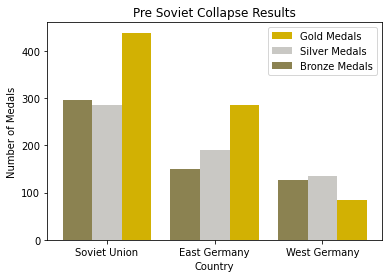

In [111]:
#plotting pre-collapse comparisons
width = 0.275
x_pre = np.array(range(len(pre_collapse_dfs)))

plt.bar(x_pre + width, golds_pre, width=width, color="#d2b103", label="Gold Medals")
plt.bar(x_pre, silvers_pre, width=width, color="#c9c8c4", label="Silver Medals")
plt.bar(x_pre - width, bronzes_pre, width=width, color="#8b8251", label="Bronze Medals")
plt.xticks(x_pre, countries_pre)
plt.title("Pre Soviet Collapse Results")
plt.ylabel("Number of Medals")
plt.xlabel("Country")
plt.legend()

plt.show()

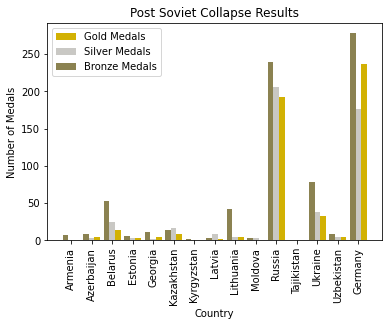

In [114]:
#plotting post-collapse comparisons
width = 0.275
x_post = np.array(range(len(post_collapse_dfs)))

plt.bar(x_post + width, golds_post, width=width, color="#d2b103", label="Gold Medals")
plt.bar(x_post, silvers_post, width=width, color="#c9c8c4", label="Silver Medals")
plt.bar(x_post - width, bronzes_post, width=width, color="#8b8251", label="Bronze Medals")
plt.xticks(x_post, countries_post, rotation=90)
plt.title("Post Soviet Collapse Results")
plt.ylabel("Number of Medals")
plt.xlabel("Country")
plt.legend()

plt.show()

Here, the results are split by year, and data is retrieved for each year.

In [76]:
#creating lists to hold medal counts and other important data by pre vs post collapse
countries_pre_collapse = []
years_pre_collapse = [1976, 1980, 1984, 1988]
golds_pre_collapse = []
silvers_pre_collapse = []
bronzes_pre_collapse = []
golds_1976 = []
silvers_1976 = []
bronzes_1976 = []
golds_1980 = []
silvers_1980 = []
bronzes_1980 = []
golds_1984 = []
silvers_1984 = []
bronzes_1984 = []
golds_1988 = []
silvers_1988 = []
bronzes_1988 = []

countries_post_collapse = []
years_post_collapse = [1992, 1996, 2000, 2004, 2008]
golds_1992 = []
silvers_1992 = []
bronzes_1992 = []
golds_1996 = []
silvers_1996 = []
bronzes_1996 = []
golds_2000 = []
silvers_2000 = []
bronzes_2000 = []
golds_2004 = []
silvers_2004 = []
bronzes_2004 = []
golds_2008 = []
silvers_2008 = []
bronzes_2008 = []

In [77]:
#function to see how many medals of each type were won by each country pre collapse
def medal_counts_pre_collapse(df):
    #sort the df by year
    yearly_data = df.groupby("Year")
    #add the country name to the list
    countries_pre_collapse.append(df["Country"][0])
    #convert medal counts by year to dictionary
    counts = yearly_data["Medal"].value_counts().to_dict()
    #get the value of each key to append to the lists, with "0" appending if no value exists
    golds_1976.append(counts.get((1976.0, "Gold"), 0))
    silvers_1976.append(counts.get((1976.0, "Silver"), 0))
    bronzes_1976.append(counts.get((1976.0, "Bronze"), 0))
    golds_1980.append(counts.get((1980.0, "Gold"), 0))
    silvers_1980.append(counts.get((1980.0, "Silver"), 0))
    bronzes_1980.append(counts.get((1980.0, "Bronze"), 0))
    golds_1984.append(counts.get((1984.0, "Gold"), 0))
    silvers_1984.append(counts.get((1984.0, "Silver"), 0))
    bronzes_1984.append(counts.get((1984.0, "Bronze"), 0))
    golds_1988.append(counts.get((1988.0, "Gold"), 0))
    silvers_1988.append(counts.get((1988.0, "Silver"), 0))
    bronzes_1988.append(counts.get((1988.0, "Bronze"), 0))

In [78]:
#function to see how many medals of each type were won by each country post collapse
def medal_counts_post_collapse(df):
    #sort the df by year
    yearly_data = df.groupby("Year")
    #add the country name to the list
    countries_post_collapse.append(df["Country"][0])
    #convert medal counts by year to dictionary
    counts = yearly_data["Medal"].value_counts().to_dict()
    #get the value of each key to append to the lists, with "0" appending if no value exists
    golds_1992.append(counts.get((1992.0, "Gold"), 0))
    silvers_1992.append(counts.get((1992.0, "Silver"), 0))
    bronzes_1992.append(counts.get((1992.0, "Bronze"), 0))
    golds_1996.append(counts.get((1996.0, "Gold"), 0))
    silvers_1996.append(counts.get((1996.0, "Silver"), 0))
    bronzes_1996.append(counts.get((1996.0, "Bronze"), 0))
    golds_2000.append(counts.get((2000.0, "Gold"), 0))
    silvers_2000.append(counts.get((2000.0, "Silver"), 0))
    bronzes_2000.append(counts.get((2000.0, "Bronze"), 0))
    golds_2004.append(counts.get((2004.0, "Gold"), 0))
    silvers_2004.append(counts.get((2004.0, "Silver"), 0))
    bronzes_2004.append(counts.get((2004.0, "Bronze"), 0))
    golds_2008.append(counts.get((2008.0, "Gold"), 0))
    silvers_2008.append(counts.get((2008.0, "Silver"), 0))
    bronzes_2008.append(counts.get((2008.0, "Bronze"), 0))       

In [79]:
#running the year counts fuctions on the appropriate countries
for country in pre_collapse_dfs:
    medal_counts_pre_collapse(country)
    
for country in post_collapse_dfs:
    medal_counts_post_collapse(country)